In [ ]:
"""

EMNIST Classification - Robert MacWha, 2021/05/08

Convolutional EMNIST classification of 28x28x1 images sourced from https://www.kaggle.com/crawford/emnist.  The dataset contains 47 (9 numeric + 38 aphabetic) unique classes. Due to similarity issues letters such as 'i' and 'j' were assigned to just one classification in the dataset.

This notebook was created for my focus create (AI) with the planed use being a demonstration of how a OCR system might work.

"""

In [1]:
#? load libraries
from IPython.display import display

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix # used for confusion matrix - nothing else

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.utils  import plot_model

np.random.seed(42)

In [2]:
#? load the dataset
TRAIN_DIRCTORY = 'D:/Datasets/EMNIST/emnist-balanced-train.csv'
TEST_DIRECTORY = 'D:/Datasets/EMNIST/emnist-balanced-test.csv'

train = pd.read_csv(TRAIN_DIRCTORY)
test  = pd.read_csv(TEST_DIRECTORY)

display(test.head(5))

,41,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532
0,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#? create a lable dictionary
# lables are in ASCII and can be decoded with the chr() function
LABEL_DIRECTORY = ''

label_map = pd.read_csv(LABEL_DIRECTORY,
                        delimiter = ' ', 
                        index_col=0, 
                        header=None, 
                        squeeze=True)

label_dictionary = {}
for index, label in enumerate(label_map):
    label_dictionary[index] = chr(label)

label_dictionary

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

Input shape: (112799, 28, 28, 1)
Output shape: (112799, 47)


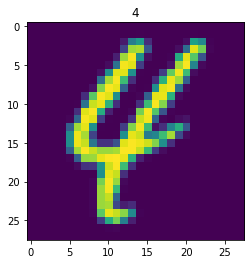

In [4]:
#? format the training data
train_Xs         = train.to_numpy()[:, 1:] / 255 # normalize the data
train_Xs         = train_Xs.reshape((-1, 28, 28, 1))
train_Xs         = np.rot90(np.flip(train_Xs, axis=2), k=1, axes=(1, 2))

train_Ys_indices = train.to_numpy()[:, 0]

# convert the indices to one-hot encoding
train_Ys = np.zeros((train_Ys_indices.size, train_Ys_indices.max()+1))
train_Ys[np.arange(train_Ys_indices.size), train_Ys_indices] = 1

test_Xs         = test.to_numpy()[:, 1:] / 255 # normalize the data
test_Xs         = test_Xs.reshape((-1, 28, 28, 1))
test_Xs         = np.rot90(np.flip(test_Xs, axis=2), k=1, axes=(1, 2))

test_Ys_indices = test.to_numpy()[:, 0]

# convert the indices to one-hot encoding
test_Ys = np.zeros((test_Ys_indices.size, test_Ys_indices.max()+1))
test_Ys[np.arange(test_Ys_indices.size), test_Ys_indices] = 1

print(f'Input shape: {train_Xs.shape}')
print(f'Output shape: {train_Ys.shape}')

plt.imshow(train_Xs[3].reshape(28, 28))
plt.title(label_dictionary[train_Ys_indices[3]])
plt.show()

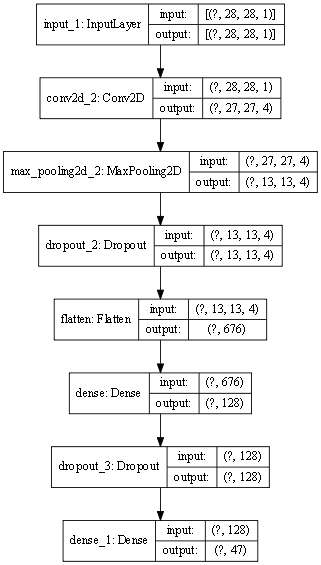

In [5]:
#? build a basic convolutional model
OUTPUT_DIM = 47

i = Input((28, 28, 1))

x = Conv2D(4, (2, 2), activation='relu')(i)
x = MaxPooling2D()(x)
x = Dropout(0.2)(x)

x = Conv2D(4, (2, 2), activation='relu')(i)
x = MaxPooling2D()(x)
x = Dropout(0.2)(x)

x = Conv2D(4, (2, 2), activation='relu')(i)
x = MaxPooling2D()(x)
x = Dropout(0.2)(x)

x = Flatten()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)

x = Dense(OUTPUT_DIM, activation='softmax')(x)

model = Model(i, x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

plot_model(model, to_file='model.png', show_shapes=True, dpi=64)

In [6]:
#? begin the training process
EPOCHS=10
BATCH_SIZE=32

history = model.fit(train_Xs, train_Ys, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(train_Xs, train_Ys))

Epoch 1/10
3525/3525 [==============================] - 14s 4ms/step - loss: 1.2759 - accuracy: 0.6266 - val_loss: 0.7425 - val_accuracy: 0.7711
Epoch 2/10
3525/3525 [==============================] - 14s 4ms/step - loss: 0.8587 - accuracy: 0.7330 - val_loss: 0.5980 - val_accuracy: 0.8106
Epoch 3/10
3525/3525 [==============================] - 15s 4ms/step - loss: 0.7624 - accuracy: 0.7588 - val_loss: 0.5379 - val_accuracy: 0.8250
Epoch 4/10
3525/3525 [==============================] - 15s 4ms/step - loss: 0.7066 - accuracy: 0.7730 - val_loss: 0.4939 - val_accuracy: 0.8368
Epoch 5/10
3525/3525 [==============================] - 15s 4ms/step - loss: 0.6669 - accuracy: 0.7838 - val_loss: 0.4663 - val_accuracy: 0.8458
Epoch 6/10
3525/3525 [==============================] - 14s 4ms/step - loss: 0.6429 - accuracy: 0.7910 - val_loss: 0.4455 - val_accuracy: 0.8515
Epoch 7/10
3525/3525 [==============================] - 14s 4ms/step - loss: 0.6159 - accuracy: 0.7978 - val_loss: 0.4261 - val_ac

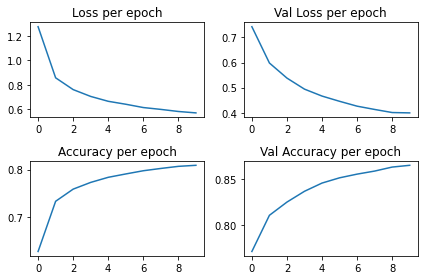

In [7]:
#? plot training information
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(history.history['loss'])
axs[0, 0].set_title('Loss per epoch')
axs[1, 0].plot(history.history['accuracy'])
axs[1, 0].set_title('Accuracy per epoch')
axs[0, 1].plot(history.history['val_loss'])
axs[0, 1].set_title('Val Loss per epoch')
axs[1, 1].plot(history.history['val_accuracy'])
axs[1, 1].set_title('Val Accuracy per epoch')

fig.tight_layout()

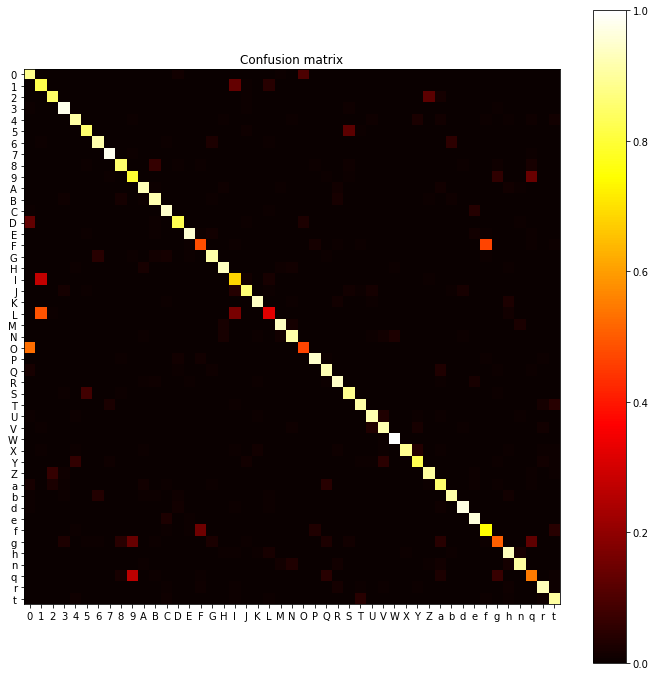

In [9]:
#? plot confusion matrix (Loosly following code from https://colab.research.google.com/drive/161SaEMssCa8vQUZQjIsIynjVqBsKzG7P)
def plot_confusion_matrix(cm, classes, title='Confusion matrix'):

    # normalize the confusion matrix
    cm = cm / np.amax(cm)

    # show the figure
    plt.figure(figsize=(12, 12))
    plt.imshow(cm, cmap='hot', interpolation='nearest')
    plt.colorbar()

    # set the tick marks to display the classifications
    plt.xticks(range(len(classes)), classes)
    plt.yticks(range(len(classes)), classes)

    # setup the title and display type
    plt.title(title)

    plt.show()

p_test = model.predict(test_Xs).argmax(axis=1)
cm = confusion_matrix(test_Ys_indices, p_test)
classes = list(label_dictionary.values())

plot_confusion_matrix(cm, classes)

In [ ]:
#? save the model for future use
